# Creating and Backtesting an SMA Crossover Strategy




__Underlying Idea:__ Momentum -> __most recent price trend persists__ in the near future
- SMA 50 captures the more recent price trend (vs. SMA 200)

  __Trading Rules:__
   - If SMA 50 __crosses above__ the SMA 200, this can be viewed as an indicator for further price increases (__buy__ signal)
   - If SMA 50 __crosses below__ the SMA 200, this can be viewed as an indicator for further price decreases (__sell__ signal)

__Trading Positions:__

- __Buy__ means taking a __long__ position (+1)
- if short selling is 
 - allowed/desired, __Sell__ means taking a __short__ position (-1) 
 - not allowed/desired, __Sell__ means taking a __neutral__ position (0)

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [295]:
df = pd.read_csv("msftdis.csv", parse_dates = ["Date"], index_col = "Date")
df

,DIS,MSFT
Date,,
2012-07-02,48.720001,30.559999
2012-07-03,48.590000,30.760000
2012-07-05,48.110001,30.700001
2012-07-06,48.040001,30.190001
2012-07-09,48.000000,30.000000
...,...,...
2022-06-23,94.300003,258.859985
2022-06-24,97.779999,267.700012
2022-06-27,96.610001,264.890015


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2012-07-02 to 2022-06-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DIS     2515 non-null   float64
 1   MSFT    2515 non-null   float64
dtypes: float64(2)
memory usage: 58.9 KB


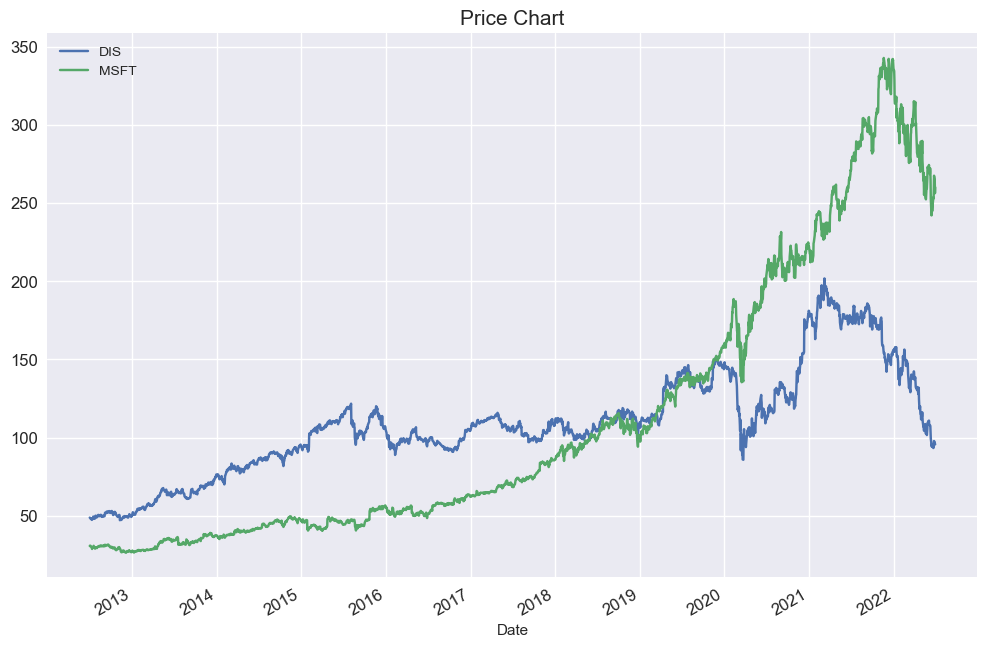

In [8]:
df.plot(figsize = (12, 8), fontsize = 12)
plt.title("Price Chart", fontsize = 15)
plt.show()

In [10]:
returns = np.log(df.div(df.shift(1))).dropna()
returns

,DIS,MSFT
Date,,
2012-07-03,-0.002672,0.006523
2012-07-05,-0.009928,-0.001952
2012-07-06,-0.001456,-0.016752
2012-07-09,-0.000833,-0.006313
2012-07-10,-0.013423,-0.008704
...,...,...
2022-06-23,0.008520,0.022384
2022-06-24,0.036239,0.033580
2022-06-27,-0.012038,-0.010552


## A simple Buy and Hold "Strategy"

In [12]:
df

,DIS,MSFT
Date,,
2012-07-02,48.720001,30.559999
2012-07-03,48.590000,30.760000
2012-07-05,48.110001,30.700001
2012-07-06,48.040001,30.190001
2012-07-09,48.000000,30.000000
...,...,...
2022-06-23,94.300003,258.859985
2022-06-24,97.779999,267.700012
2022-06-27,96.610001,264.890015


In [14]:
returns

,DIS,MSFT
Date,,
2012-07-03,-0.002672,0.006523
2012-07-05,-0.009928,-0.001952
2012-07-06,-0.001456,-0.016752
2012-07-09,-0.000833,-0.006313
2012-07-10,-0.013423,-0.008704
...,...,...
2022-06-23,0.008520,0.022384
2022-06-24,0.036239,0.033580
2022-06-27,-0.012038,-0.010552


In [20]:
returns.sum().apply(np.exp) # multiple

DIS     1.963259
MSFT    8.516362
dtype: float64

In [22]:
df.iloc[-1] / df.iloc[0] # multiple

DIS     1.963259
MSFT    8.516362
dtype: float64

In [24]:
norm = returns.cumsum().apply(np.exp)
norm

,DIS,MSFT
Date,,
2012-07-03,0.997332,1.006545
2012-07-05,0.987479,1.004581
2012-07-06,0.986043,0.987893
2012-07-09,0.985222,0.981675
2012-07-10,0.972085,0.973168
...,...,...
2022-06-23,1.935550,8.470549
2022-06-24,2.006979,8.759817
2022-06-27,1.982964,8.667867


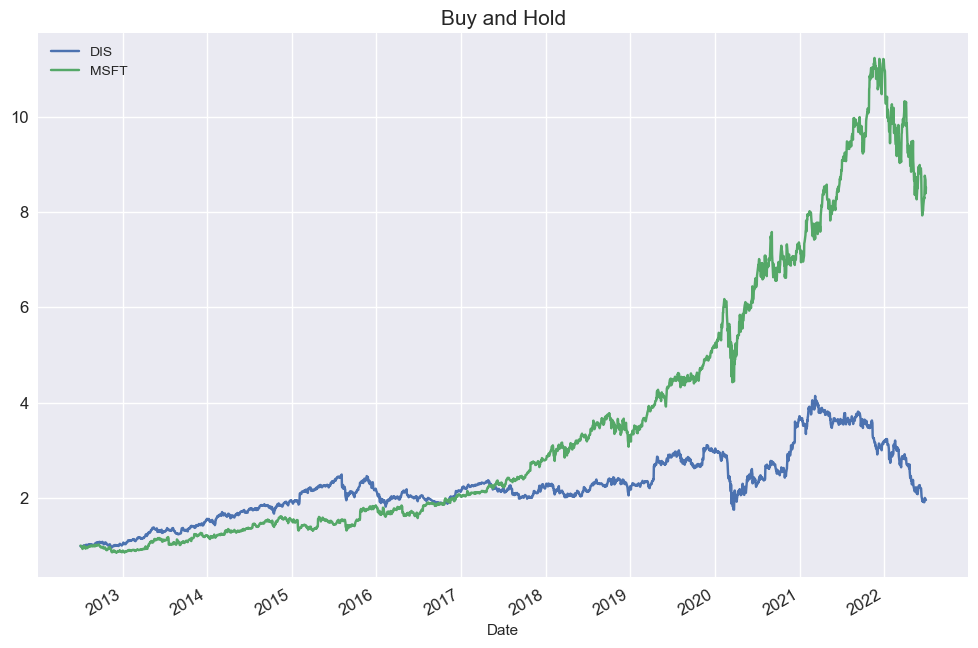

In [26]:
norm.plot(figsize = (12, 8), fontsize = 12)
plt.title("Buy and Hold", fontsize = 15)
plt.show()

In [28]:
td_year = 252 # 252 Trading Days per year (on average)

In [34]:
def ann_risk_return(returns_df): # assumes log returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(td_year)
    summary["CAGR"] = np.exp(returns_df.mean() * td_year) - 1
    return summary

In [36]:
summary = ann_risk_return(returns)
summary

,ann. Risk,CAGR
DIS,0.251748,0.069960
MSFT,0.262896,0.239503


## Defining an SMA Crossover Strategy

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [40]:
data = pd.read_csv("msftdis.csv", parse_dates = ["Date"], index_col = "Date")
data

,DIS,MSFT
Date,,
2012-07-02,48.720001,30.559999
2012-07-03,48.590000,30.760000
2012-07-05,48.110001,30.700001
2012-07-06,48.040001,30.190001
2012-07-09,48.000000,30.000000
...,...,...
2022-06-23,94.300003,258.859985
2022-06-24,97.779999,267.700012
2022-06-27,96.610001,264.890015


In [42]:
symbol = "DIS"

In [44]:
df = data[symbol].to_frame()
df

,DIS
Date,
2012-07-02,48.720001
2012-07-03,48.590000
2012-07-05,48.110001
2012-07-06,48.040001
2012-07-09,48.000000
...,...
2022-06-23,94.300003
2022-06-24,97.779999
2022-06-27,96.610001


In [46]:
df.columns = ["Price"]
df

,Price
Date,
2012-07-02,48.720001
2012-07-03,48.590000
2012-07-05,48.110001
2012-07-06,48.040001
2012-07-09,48.000000
...,...
2022-06-23,94.300003
2022-06-24,97.779999
2022-06-27,96.610001


In [48]:
sma_s = 50 # short period
sma_l = 200 # long # period

In [50]:
df.rolling(50).mean() # rolling mean (moving average)

,Price
Date,
2012-07-02,NaN
2012-07-03,NaN
2012-07-05,NaN
2012-07-06,NaN
2012-07-09,NaN
...,...
2022-06-23,109.2594
2022-06-24,108.5982
2022-06-27,107.8834


In [66]:
df["SMA_s"] =  df.Price.rolling(sma_s).mean()
df

,Price,SMA_s,SMA_l
Date,,,
2013-04-19,61.560001,NaN,52.01580
2013-04-22,62.009998,NaN,52.08225
2013-04-23,62.590000,NaN,52.15225
2013-04-24,61.939999,NaN,52.22140
2013-04-25,62.000000,NaN,52.29120
...,...,...,...
2022-06-23,94.300003,109.2594,143.72190
2022-06-24,97.779999,108.5982,143.28505
2022-06-27,96.610001,107.8834,142.83855


In [54]:
df["SMA_l"] =  df.Price.rolling(sma_l).mean()
df

,Price,SMA_s,SMA_l
Date,,,
2012-07-02,48.720001,NaN,NaN
2012-07-03,48.590000,NaN,NaN
2012-07-05,48.110001,NaN,NaN
2012-07-06,48.040001,NaN,NaN
2012-07-09,48.000000,NaN,NaN
...,...,...,...
2022-06-23,94.300003,109.2594,143.72190
2022-06-24,97.779999,108.5982,143.28505
2022-06-27,96.610001,107.8834,142.83855


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2012-07-02 to 2022-06-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2515 non-null   float64
 1   SMA_s   2466 non-null   float64
 2   SMA_l   2316 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


In [58]:
df.dropna(inplace = True)
df

,Price,SMA_s,SMA_l
Date,,,
2013-04-19,61.560001,56.8320,52.01580
2013-04-22,62.009998,56.9850,52.08225
2013-04-23,62.590000,57.1436,52.15225
2013-04-24,61.939999,57.2874,52.22140
2013-04-25,62.000000,57.4284,52.29120
...,...,...,...
2022-06-23,94.300003,109.2594,143.72190
2022-06-24,97.779999,108.5982,143.28505
2022-06-27,96.610001,107.8834,142.83855


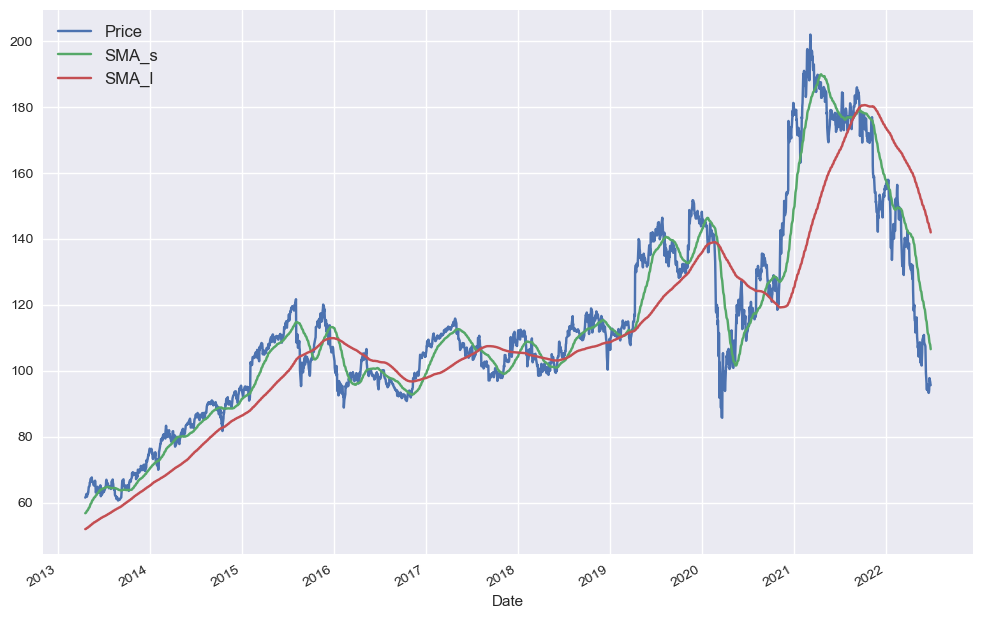

In [60]:
df.plot(figsize = (12, 8))
plt.legend(fontsize = 12)
plt.show()

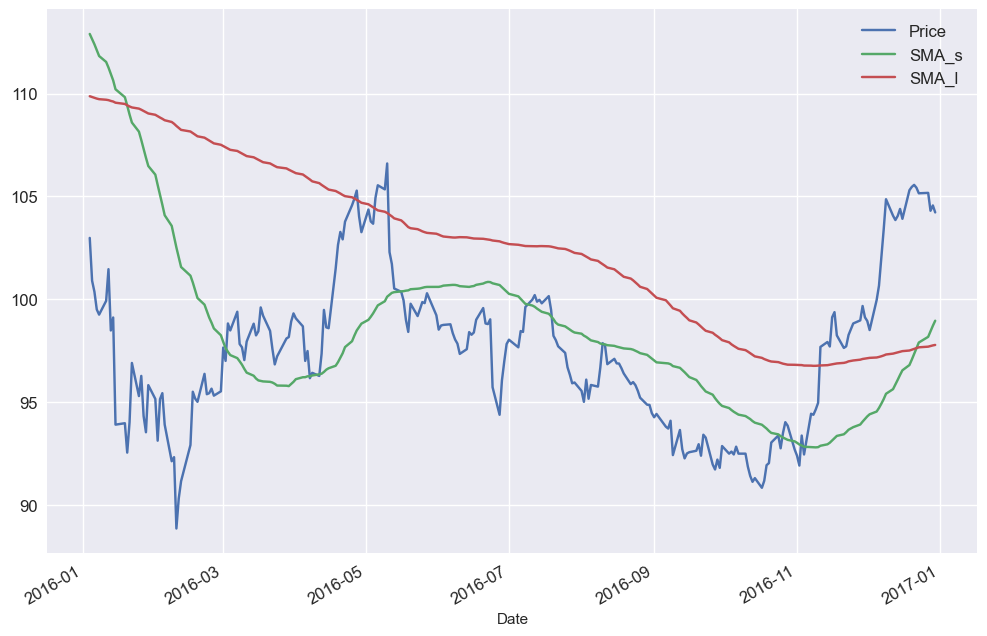

In [62]:
df.loc["2016"].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

__Long-Short Strategy__

In [68]:
df["position"] = np.where(df["SMA_s"] > df["SMA_l"], 1, -1 )

df['position'] = np.where(df['SMA_s']> df['SMA_l'], 1, -1)

In [70]:
df

,Price,SMA_s,SMA_l,position
Date,,,,
2013-04-19,61.560001,NaN,52.01580,-1
2013-04-22,62.009998,NaN,52.08225,-1
2013-04-23,62.590000,NaN,52.15225,-1
2013-04-24,61.939999,NaN,52.22140,-1
2013-04-25,62.000000,NaN,52.29120,-1
...,...,...,...,...
2022-06-23,94.300003,109.2594,143.72190,-1
2022-06-24,97.779999,108.5982,143.28505,-1
2022-06-27,96.610001,107.8834,142.83855,-1


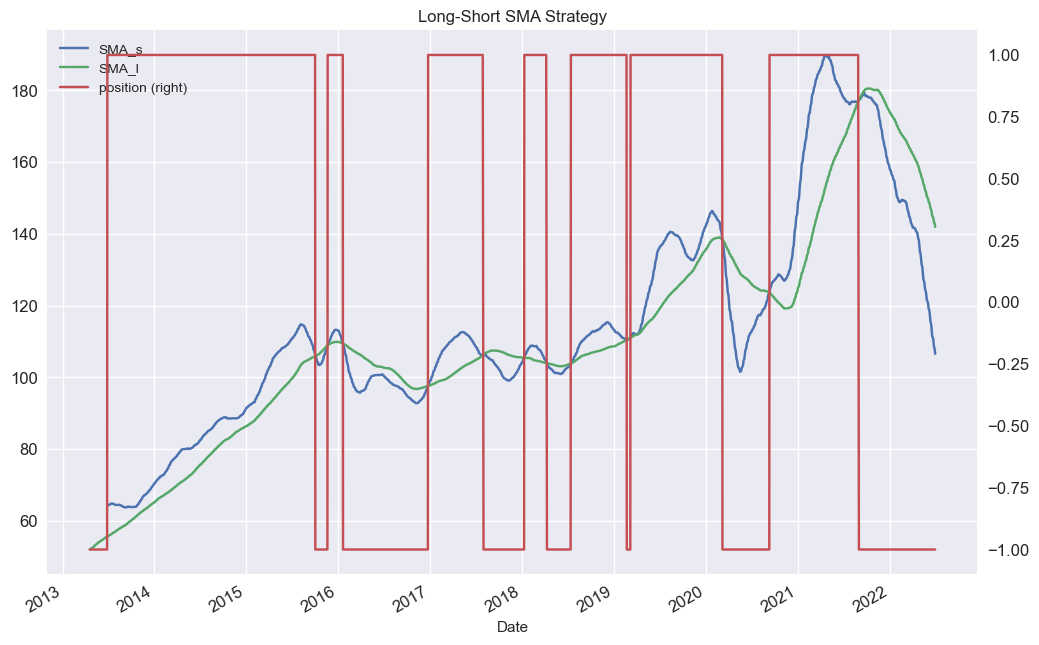

In [72]:
df.loc[:, ["SMA_s", "SMA_l", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position")

plt.title("Long-Short SMA Strategy")
plt.show()

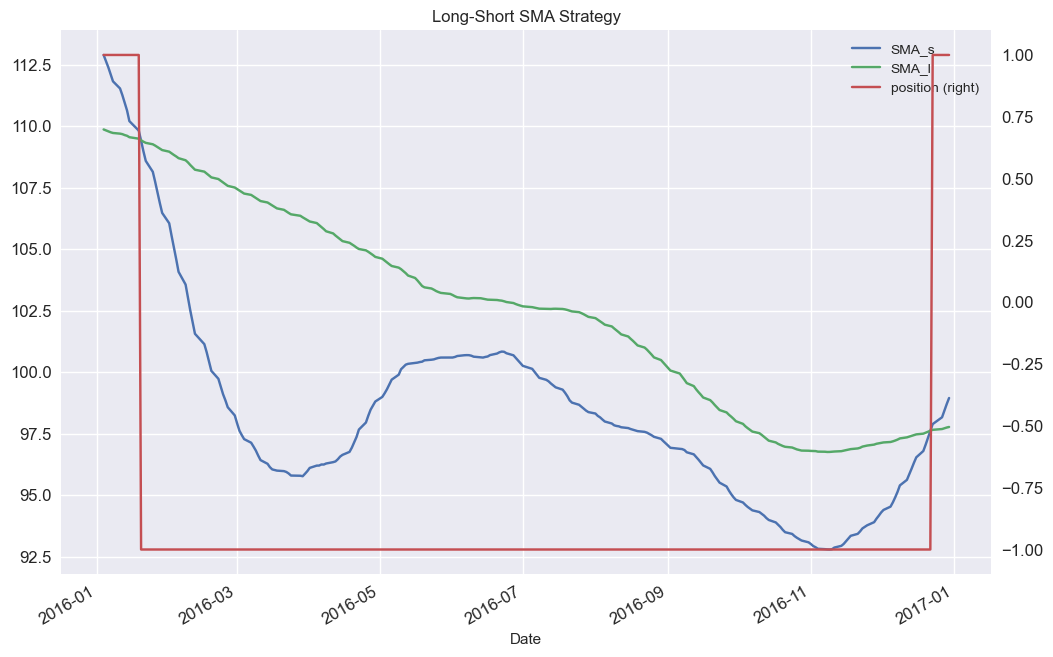

In [74]:
df.loc["2016", ["SMA_s", "SMA_l", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position")
plt.title("Long-Short SMA Strategy")
plt.show()

## Vectorized Strategy Backtesting

In [76]:
df

,Price,SMA_s,SMA_l,position
Date,,,,
2013-04-19,61.560001,NaN,52.01580,-1
2013-04-22,62.009998,NaN,52.08225,-1
2013-04-23,62.590000,NaN,52.15225,-1
2013-04-24,61.939999,NaN,52.22140,-1
2013-04-25,62.000000,NaN,52.29120,-1
...,...,...,...,...
2022-06-23,94.300003,109.2594,143.72190,-1
2022-06-24,97.779999,108.5982,143.28505,-1
2022-06-27,96.610001,107.8834,142.83855,-1


In [80]:
df["returns"] = np.log(df.Price.div(df.Price.shift(1))) # returns of buy-and-hold
df

,Price,SMA_s,SMA_l,position,returns
Date,,,,,
2013-04-19,61.560001,NaN,52.01580,-1,NaN
2013-04-22,62.009998,NaN,52.08225,-1,0.007283
2013-04-23,62.590000,NaN,52.15225,-1,0.009310
2013-04-24,61.939999,NaN,52.22140,-1,-0.010439
2013-04-25,62.000000,NaN,52.29120,-1,0.000968
...,...,...,...,...,...
2022-06-23,94.300003,109.2594,143.72190,-1,0.008520
2022-06-24,97.779999,108.5982,143.28505,-1,0.036239
2022-06-27,96.610001,107.8834,142.83855,-1,-0.012038


In [84]:
df["strategy"] = df.position.shift(1) * df["returns"] # strategy returns
df

,Price,SMA_s,SMA_l,position,returns,strategy
Date,,,,,,
2013-04-19,61.560001,NaN,52.01580,-1,NaN,NaN
2013-04-22,62.009998,NaN,52.08225,-1,0.007283,-0.007283
2013-04-23,62.590000,NaN,52.15225,-1,0.009310,-0.009310
2013-04-24,61.939999,NaN,52.22140,-1,-0.010439,0.010439
2013-04-25,62.000000,NaN,52.29120,-1,0.000968,-0.000968
...,...,...,...,...,...,...
2022-06-23,94.300003,109.2594,143.72190,-1,0.008520,-0.008520
2022-06-24,97.779999,108.5982,143.28505,-1,0.036239,-0.036239
2022-06-27,96.610001,107.8834,142.83855,-1,-0.012038,0.012038


In [86]:
df.dropna(inplace = True)
df

,Price,SMA_s,SMA_l,position,returns,strategy
Date,,,,,,
2013-06-28,63.150002,64.3402,55.70115,1,-0.008986,0.008986
2013-07-01,63.930000,64.3876,55.76300,1,0.012276,0.012276
2013-07-02,63.259998,64.4126,55.82080,1,-0.010536,-0.010536
2013-07-03,63.610001,64.4330,55.87585,1,0.005518,0.005518
2013-07-05,63.820000,64.4706,55.93320,1,0.003296,0.003296
...,...,...,...,...,...,...
2022-06-23,94.300003,109.2594,143.72190,-1,0.008520,-0.008520
2022-06-24,97.779999,108.5982,143.28505,-1,0.036239,-0.036239
2022-06-27,96.610001,107.8834,142.83855,-1,-0.012038,0.012038


In [88]:
td_year = 252 # 252 Trading Days per year (on average)

In [90]:
def ann_risk_return(returns_df): # assumes log returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(td_year)
    summary["CAGR"] = np.exp(returns_df.mean() * td_year) - 1
    return summary

In [92]:
ann_risk_return(df[["returns", "strategy"]])

,ann. Risk,CAGR
returns,0.258017,0.046188
strategy,0.257995,0.072795


In [94]:
df["bh_norm"] = df["returns"].cumsum().apply(np.exp)
df["strat_norm"] = df["strategy"].cumsum().apply(np.exp)

In [96]:
df

,Price,SMA_s,SMA_l,position,returns,strategy,bh_norm,strat_norm
Date,,,,,,,,
2013-06-28,63.150002,64.3402,55.70115,1,-0.008986,0.008986,0.991055,1.009026
2013-07-01,63.930000,64.3876,55.76300,1,0.012276,0.012276,1.003296,1.021489
2013-07-02,63.259998,64.4126,55.82080,1,-0.010536,-0.010536,0.992781,1.010784
2013-07-03,63.610001,64.4330,55.87585,1,0.005518,0.005518,0.998274,1.016376
2013-07-05,63.820000,64.4706,55.93320,1,0.003296,0.003296,1.001569,1.019732
...,...,...,...,...,...,...,...,...
2022-06-23,94.300003,109.2594,143.72190,-1,0.008520,-0.008520,1.479912,1.908540
2022-06-24,97.779999,108.5982,143.28505,-1,0.036239,-0.036239,1.534526,1.840615
2022-06-27,96.610001,107.8834,142.83855,-1,-0.012038,0.012038,1.516164,1.862905


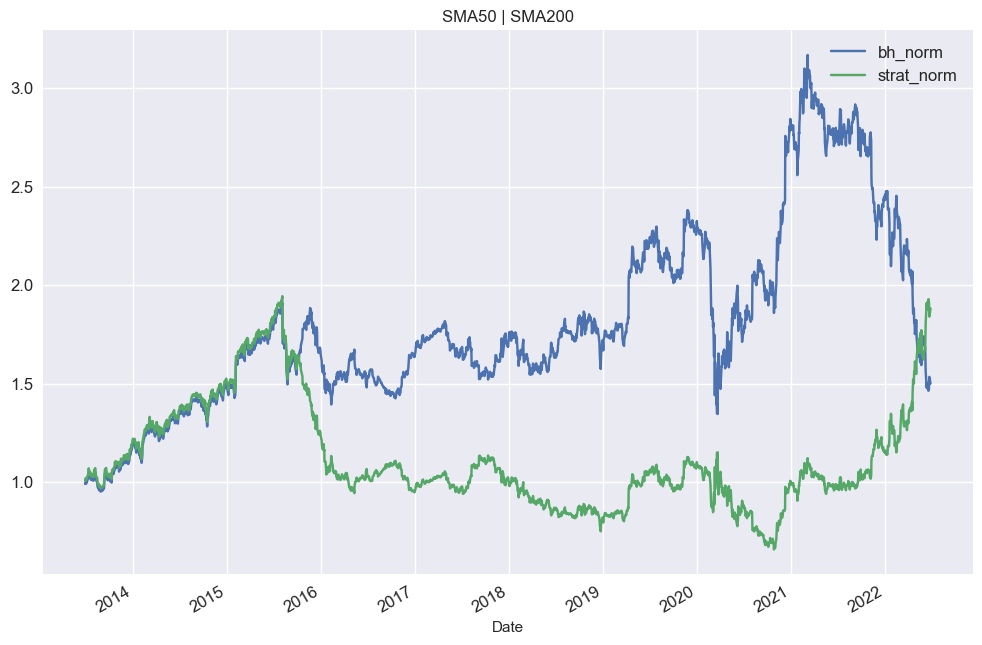

In [98]:
df[["bh_norm", "strat_norm"]].plot(figsize = (12, 8), title = "SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [100]:
outperf = df.strat_norm.iloc[-1] - df.bh_norm.iloc[-1]
outperf

0.3805040370446824

-> Reliable/Stable Outperformance of Strategy? No. (maybe in bear markets only)

## Finding the optimal SMA Strategy

In [102]:
df = pd.read_csv("msftdis.csv", parse_dates = ["Date"], index_col = "Date")
df

,DIS,MSFT
Date,,
2012-07-02,48.720001,30.559999
2012-07-03,48.590000,30.760000
2012-07-05,48.110001,30.700001
2012-07-06,48.040001,30.190001
2012-07-09,48.000000,30.000000
...,...,...
2022-06-23,94.300003,258.859985
2022-06-24,97.779999,267.700012
2022-06-27,96.610001,264.890015


In [104]:
symbol = "DIS"

In [106]:
df = df[symbol].to_frame()
df

,DIS
Date,
2012-07-02,48.720001
2012-07-03,48.590000
2012-07-05,48.110001
2012-07-06,48.040001
2012-07-09,48.000000
...,...
2022-06-23,94.300003
2022-06-24,97.779999
2022-06-27,96.610001


In [108]:
df.columns = ["price"]
df

,price
Date,
2012-07-02,48.720001
2012-07-03,48.590000
2012-07-05,48.110001
2012-07-06,48.040001
2012-07-09,48.000000
...,...
2022-06-23,94.300003
2022-06-24,97.779999
2022-06-27,96.610001


In [110]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    return data[["returns", "strategy"]].sum().apply(np.exp) #multiple

In [112]:
run_strategy(SMA = (50, 200))

returns     1.553769
strategy    1.912935
dtype: float64

In [114]:
run_strategy(SMA = (10, 50))

returns     1.855120
strategy    3.053683
dtype: float64

In [116]:
run_strategy(SMA = (22, 252))

returns     1.503694
strategy    2.535624
dtype: float64

In [285]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return -data[["returns", "strategy"]].sum().apply(np.exp).iloc[-1] # negative multiple -> minimize

In [287]:
from scipy.optimize import brute

In [289]:
brute(run_strategy, ((10, 50, 1), (100, 252, 1)))

array([ 23., 189.])

In [290]:
-run_strategy((23, 189))

2.9762509431113324

## Trades and Transaction Costs (Part 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [128]:
df = pd.read_csv("msftdis.csv", parse_dates = ["Date"], index_col = "Date")
df

,DIS,MSFT
Date,,
2012-07-02,48.720001,30.559999
2012-07-03,48.590000,30.760000
2012-07-05,48.110001,30.700001
2012-07-06,48.040001,30.190001
2012-07-09,48.000000,30.000000
...,...,...
2022-06-23,94.300003,258.859985
2022-06-24,97.779999,267.700012
2022-06-27,96.610001,264.890015


In [ ]:
symbol = "DIS"

In [152]:
df = df[symbol].to_frame()
df

,DIS
Date,
2012-07-02,48.720001
2012-07-03,48.590000
2012-07-05,48.110001
2012-07-06,48.040001
2012-07-09,48.000000
...,...
2022-06-23,94.300003
2022-06-24,97.779999
2022-06-27,96.610001


In [154]:
df.columns = ["price"]
df

,price
Date,
2012-07-02,48.720001
2012-07-03,48.590000
2012-07-05,48.110001
2012-07-06,48.040001
2012-07-09,48.000000
...,...
2022-06-23,94.300003
2022-06-24,97.779999
2022-06-27,96.610001


In [156]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    data["bh_norm"] = data["returns"].cumsum().apply(np.exp)
    data["strat_norm"] = data["strategy"].cumsum().apply(np.exp)
    
    return data

In [158]:
df = run_strategy((50, 200))
df

,price,returns,SMA_S,SMA_L,position,strategy,bh_norm,strat_norm
Date,,,,,,,,
2013-04-22,62.009998,0.007283,56.9850,52.08225,1,0.007283,1.007310,1.007310
2013-04-23,62.590000,0.009310,57.1436,52.15225,1,0.009310,1.016732,1.016732
2013-04-24,61.939999,-0.010439,57.2874,52.22140,1,-0.010439,1.006173,1.006173
2013-04-25,62.000000,0.000968,57.4284,52.29120,1,0.000968,1.007147,1.007147
2013-04-26,61.869999,-0.002099,57.5666,52.36055,1,-0.002099,1.005036,1.005036
...,...,...,...,...,...,...,...,...
2022-06-23,94.300003,0.008520,109.2594,143.72190,-1,-0.008520,1.531839,1.940321
2022-06-24,97.779999,0.036239,108.5982,143.28505,-1,-0.036239,1.588369,1.871265
2022-06-27,96.610001,-0.012038,107.8834,142.83855,-1,0.012038,1.569363,1.893927


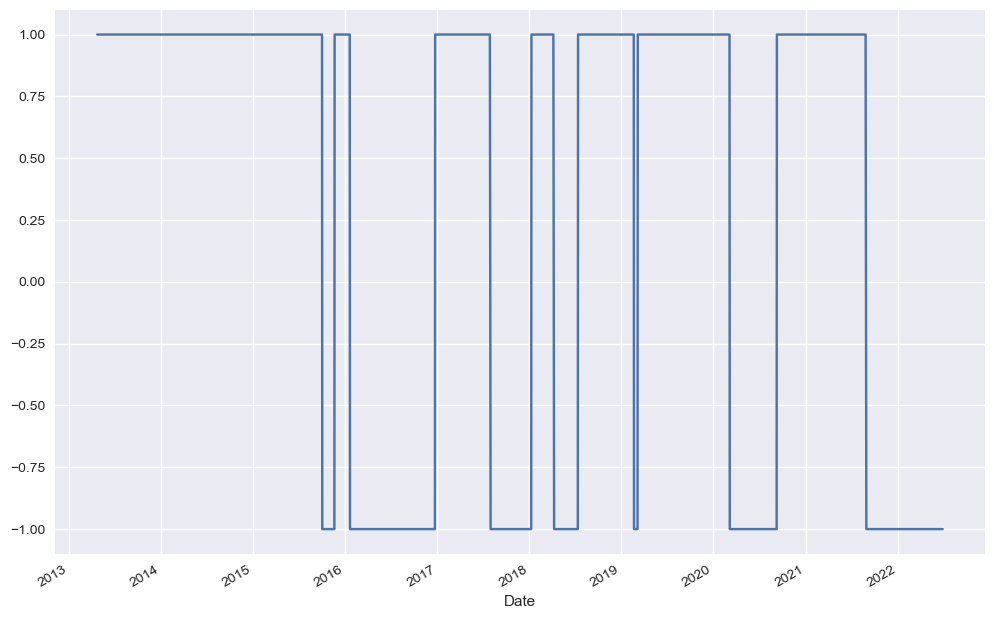

In [160]:
df.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

In [161]:
df.position.diff().fillna(0).abs()

Date
2013-04-22    0.0
2013-04-23    0.0
2013-04-24    0.0
2013-04-25    0.0
2013-04-26    0.0
             ... 
2022-06-23    0.0
2022-06-24    0.0
2022-06-27    0.0
2022-06-28    0.0
2022-06-29    0.0
Name: position, Length: 2315, dtype: float64

In [164]:
df["trades"] = df.position.diff().fillna(0).abs()
df

,price,returns,SMA_S,SMA_L,position,strategy,bh_norm,strat_norm,trades
Date,,,,,,,,,
2013-04-22,62.009998,0.007283,56.9850,52.08225,1,0.007283,1.007310,1.007310,0.0
2013-04-23,62.590000,0.009310,57.1436,52.15225,1,0.009310,1.016732,1.016732,0.0
2013-04-24,61.939999,-0.010439,57.2874,52.22140,1,-0.010439,1.006173,1.006173,0.0
2013-04-25,62.000000,0.000968,57.4284,52.29120,1,0.000968,1.007147,1.007147,0.0
2013-04-26,61.869999,-0.002099,57.5666,52.36055,1,-0.002099,1.005036,1.005036,0.0
...,...,...,...,...,...,...,...,...,...
2022-06-23,94.300003,0.008520,109.2594,143.72190,-1,-0.008520,1.531839,1.940321,0.0
2022-06-24,97.779999,0.036239,108.5982,143.28505,-1,-0.036239,1.588369,1.871265,0.0
2022-06-27,96.610001,-0.012038,107.8834,142.83855,-1,0.012038,1.569363,1.893927,0.0


In [166]:
df.trades.value_counts()

trades
0.0    2302
2.0      13
Name: count, dtype: int64

In [168]:
df[df.trades != 0]

,price,returns,SMA_S,SMA_L,position,strategy,bh_norm,strat_norm,trades
Date,,,,,,,,,
2015-10-02,103.000000,0.003209,105.909800,105.93440,-1,0.003209,1.673164,1.673164,2.0
2015-11-20,120.070000,0.011391,109.148599,109.01720,1,-0.011391,1.950455,1.435295,2.0
2016-01-20,92.540001,-0.015335,109.413800,109.42890,-1,-0.015335,1.503249,1.106207,2.0
2016-12-23,105.150002,-0.002564,97.892800,97.66030,1,0.002564,1.708090,0.973546,2.0
2017-07-31,109.930000,-0.000273,106.236800,106.26095,-1,-0.000273,1.785737,1.017802,2.0
2018-01-09,109.940002,-0.000727,105.563000,105.50920,1,0.000727,1.785900,1.017710,2.0
2018-04-09,99.699997,-0.006498,103.921800,103.96135,-1,-0.006498,1.619558,0.922919,2.0
2018-07-13,110.000000,0.016037,103.883000,103.85400,1,-0.016037,1.786875,0.836500,2.0
2019-02-20,113.680000,0.001497,110.431000,110.45275,-1,0.001497,1.846654,0.864484,2.0


In [170]:
df.loc["2015-10"].head()

,price,returns,SMA_S,SMA_L,position,strategy,bh_norm,strat_norm,trades
Date,,,,,,,,,
2015-10-01,102.669998,0.004588,106.2258,105.87025,1,0.004588,1.667804,1.667804,0.0
2015-10-02,103.000000,0.003209,105.9098,105.93440,-1,0.003209,1.673164,1.673164,2.0
2015-10-05,103.849998,0.008219,105.6086,105.99675,-1,-0.008219,1.686972,1.659470,0.0
2015-10-06,103.769997,-0.000771,105.3190,106.05255,-1,0.000771,1.685672,1.660749,0.0
2015-10-07,103.389999,-0.003669,105.0176,106.10505,-1,0.003669,1.679500,1.666853,0.0


## Trades and Trading Costs (Part 2)

In [174]:
df

,price,returns,SMA_S,SMA_L,position,strategy,bh_norm,strat_norm,trades
Date,,,,,,,,,
2013-04-22,62.009998,0.007283,56.9850,52.08225,1,0.007283,1.007310,1.007310,0.0
2013-04-23,62.590000,0.009310,57.1436,52.15225,1,0.009310,1.016732,1.016732,0.0
2013-04-24,61.939999,-0.010439,57.2874,52.22140,1,-0.010439,1.006173,1.006173,0.0
2013-04-25,62.000000,0.000968,57.4284,52.29120,1,0.000968,1.007147,1.007147,0.0
2013-04-26,61.869999,-0.002099,57.5666,52.36055,1,-0.002099,1.005036,1.005036,0.0
...,...,...,...,...,...,...,...,...,...
2022-06-23,94.300003,0.008520,109.2594,143.72190,-1,-0.008520,1.531839,1.940321,0.0
2022-06-24,97.779999,0.036239,108.5982,143.28505,-1,-0.036239,1.588369,1.871265,0.0
2022-06-27,96.610001,-0.012038,107.8834,142.83855,-1,0.012038,1.569363,1.893927,0.0


In [176]:
ptc = 0.003

In [178]:
df["strategy_net"] = df.strategy - df.trades * ptc

In [180]:
df["strat_norm_net"] = df.strategy_net.cumsum().apply(np.exp)

In [182]:
df

,price,returns,SMA_S,SMA_L,position,strategy,bh_norm,strat_norm,trades,strategy_net,strat_norm_net
Date,,,,,,,,,,,
2013-04-22,62.009998,0.007283,56.9850,52.08225,1,0.007283,1.007310,1.007310,0.0,0.007283,1.007310
2013-04-23,62.590000,0.009310,57.1436,52.15225,1,0.009310,1.016732,1.016732,0.0,0.009310,1.016732
2013-04-24,61.939999,-0.010439,57.2874,52.22140,1,-0.010439,1.006173,1.006173,0.0,-0.010439,1.006173
2013-04-25,62.000000,0.000968,57.4284,52.29120,1,0.000968,1.007147,1.007147,0.0,0.000968,1.007147
2013-04-26,61.869999,-0.002099,57.5666,52.36055,1,-0.002099,1.005036,1.005036,0.0,-0.002099,1.005036
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,94.300003,0.008520,109.2594,143.72190,-1,-0.008520,1.531839,1.940321,0.0,-0.008520,1.794728
2022-06-24,97.779999,0.036239,108.5982,143.28505,-1,-0.036239,1.588369,1.871265,0.0,-0.036239,1.730853
2022-06-27,96.610001,-0.012038,107.8834,142.83855,-1,0.012038,1.569363,1.893927,0.0,0.012038,1.751815


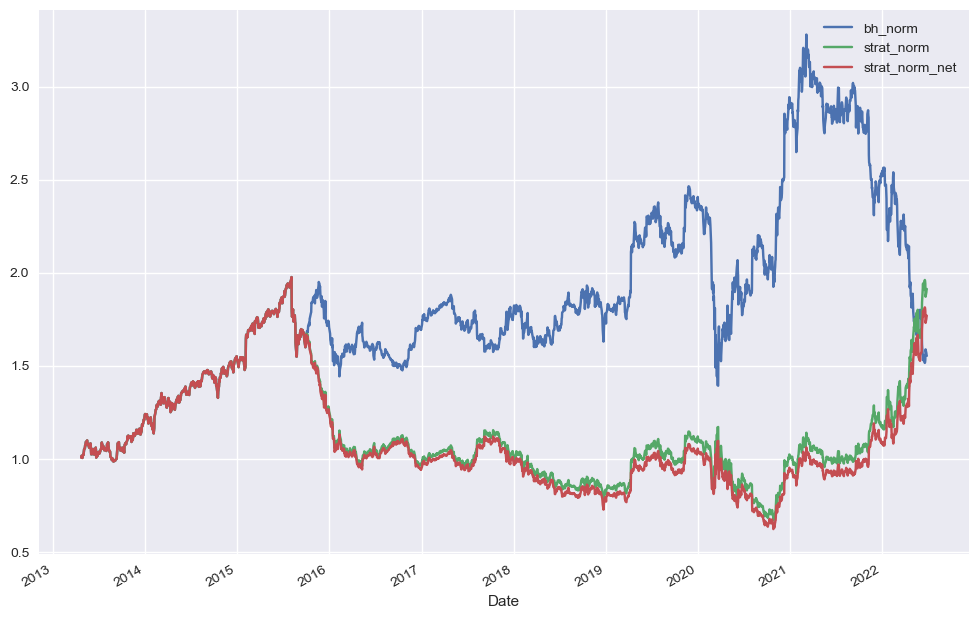

In [184]:
df[["bh_norm", "strat_norm", "strat_norm_net"]].plot(figsize = (12 , 8))
plt.show()

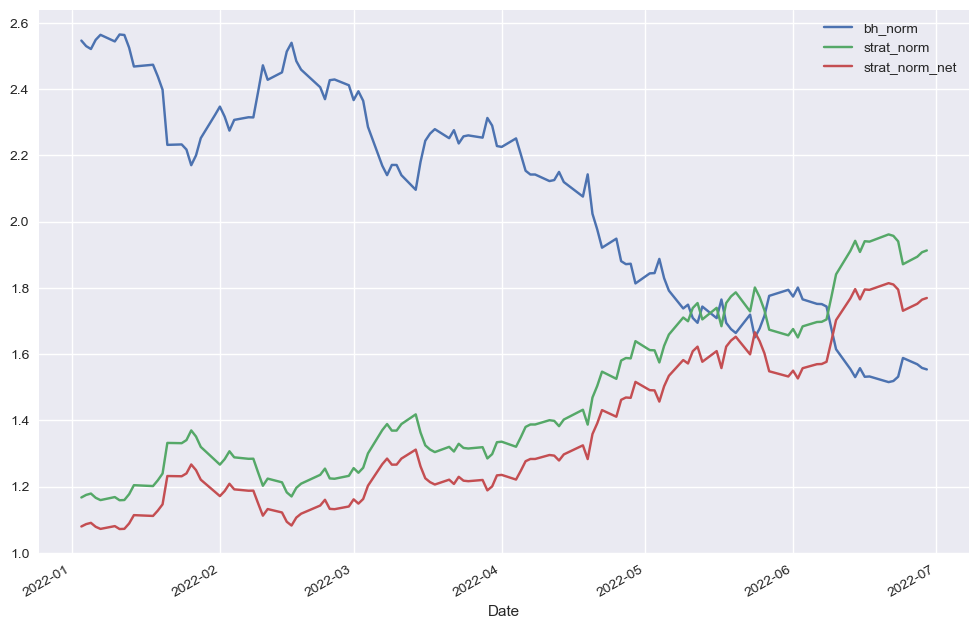

In [185]:
df.loc["2022", ["bh_norm", "strat_norm", "strat_norm_net"]].plot(figsize = (12 , 8))
plt.show()

## The SMA Backtester Class

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [192]:
class SMABacktester(): 
    ''' Class for the vectorized backtesting of SMA-based trading strategies.

    Attributes
    ==========
    filepath: str
        filename/path of the local csv file
    symbol: str
        ticker symbol to be tested
    SMA_S: int
        time window in days for shorter SMA
    SMA_L: int
        time window in days for longer SMA
    start: str
        start date for analysis
    end: str
        end date for analysis
    tc: float
        proportional transaction/trading costs per trade
    sell_pos: either -1 (default) or 0
        allow(-1) or disable (0) short-selling 
        
    Methods
    =======
    get_data:
        loads and prepares the data from csv
        
    set_parameters:
        sets one or two new SMA parameters und updates time-series
        
    test_strategy:
        runs the backtest for the SMA-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy-and-hold
        
    update_and_run:
        updates SMA parameters and returns the negative multiple (for minimizatio)
        
    optimize_parameters:
        implements a brute force optimization for the two SMA parameters
    '''
    
    def __init__(self, filepath, symbol, SMA_S, SMA_L, start, end, tc, sell_pos = -1):
        self.filepath = filepath
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.tc = tc
        self.sell_pos = sell_pos
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})".format(self.symbol, self.SMA_S, self.SMA_L, self.start, self.end)
        
    def get_data(self):
        ''' Loads and prepares the data.
        '''
        raw = pd.read_csv(self.filepath, parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and resp. time series.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, self.sell_pos)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["bh_norm"] = data["returns"].cumsum().apply(np.exp)
        data["strat_norm"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["strat_norm"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["bh_norm"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy
        compared to buy-and-hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {} | TC = {}".format(self.symbol, self.SMA_S, self.SMA_L, self.tc)
            self.results[["strat_norm", "bh_norm"]].plot(title=title, figsize=(12, 8))
        
    def update_and_run(self, SMA):
        ''' Updates SMA parameters and returns the negative multiple (for minimization algorithm).

        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA1_range, SMA2_range):
        ''' Finds global maximum given the SMA parameter ranges.

        Parameters
        ==========
        SMA1_range, SMA2_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)

In [194]:
filepath = "msftdis.csv"

In [196]:
ptc = 0.005 

In [198]:
symbol = "MSFT"

In [200]:
sma_s = 50
sma_l = 200

In [202]:
start = "2012-07-02"
end = "2022-06-29"

In [204]:
tester = SMABacktester(filepath, symbol, sma_s, sma_l, start, end, ptc, sell_pos = -1)
tester

SMABacktester(symbol = MSFT, SMA_S = 50, SMA_L = 200, start = 2012-07-02, end = 2022-06-29)

In [206]:
tester.test_strategy()

(3.922891, -4.819467)

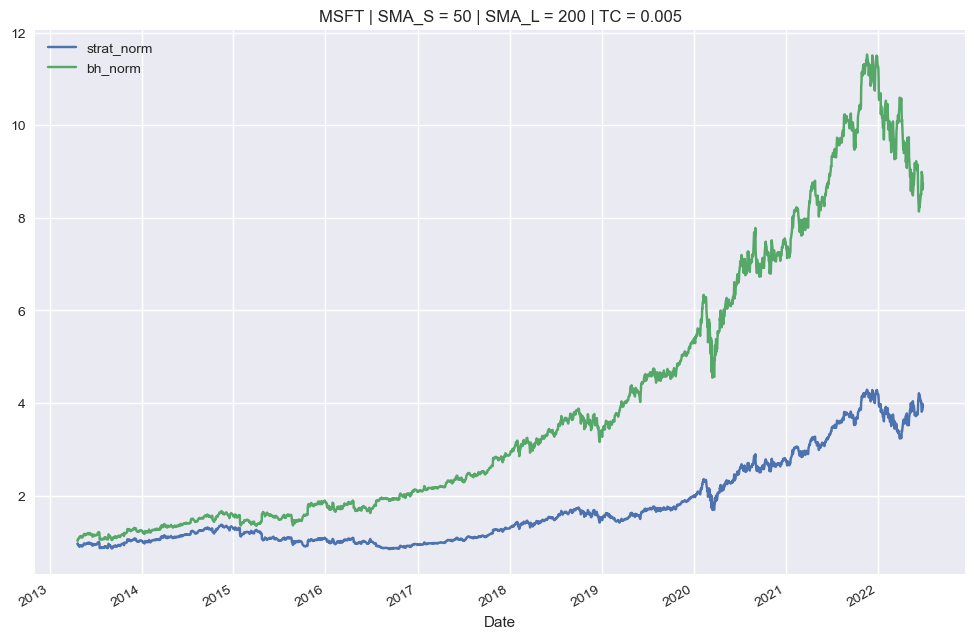

In [208]:
tester.plot_results()

In [210]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,trades,bh_norm,strat_norm
Date,,,,,,,,,
2013-04-22,30.830000,0.034987,28.341400,28.68855,-1,-0.034987,0.0,1.035606,0.965618
2013-04-23,30.600000,-0.007488,28.402400,28.68775,-1,0.007488,0.0,1.027880,0.972876
2013-04-24,31.760000,0.037208,28.480400,28.69305,-1,-0.037208,0.0,1.066846,0.937343
2013-04-25,31.940001,0.005652,28.561600,28.70180,-1,-0.005652,0.0,1.072892,0.932060
2013-04-26,31.790001,-0.004707,28.636800,28.71075,-1,0.004707,0.0,1.067854,0.936458
...,...,...,...,...,...,...,...,...,...
2022-06-23,258.859985,0.022384,268.049398,299.76645,-1,-0.022384,0.0,8.695330,3.944108
2022-06-24,267.700012,0.033580,267.762198,299.60390,-1,-0.033580,0.0,8.992274,3.813865
2022-06-27,264.890015,-0.010552,267.307599,299.44210,-1,0.010552,0.0,8.897884,3.854323


In [212]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

(array([ 35., 227.]), 6.786691)

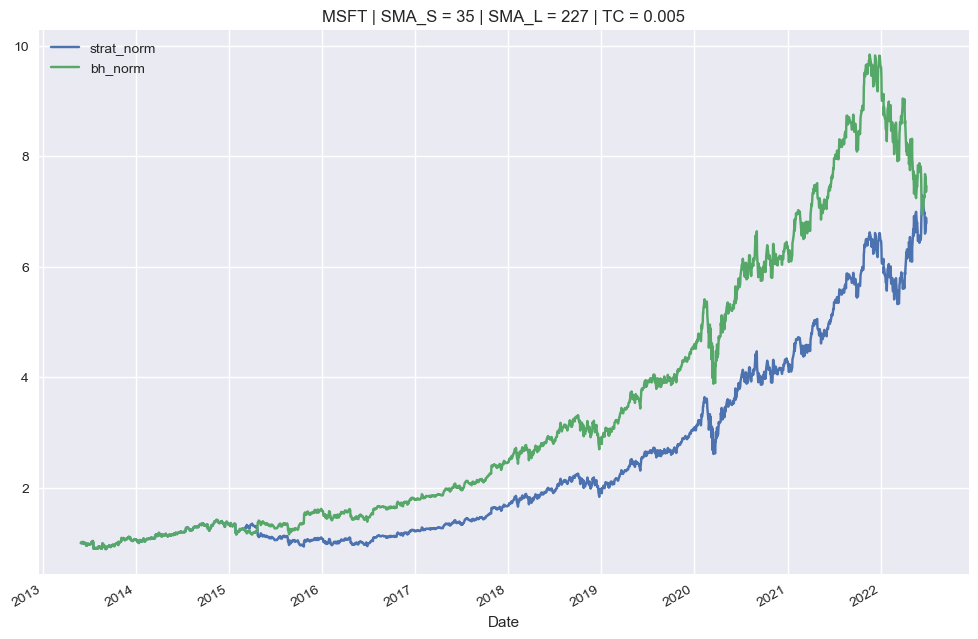

In [213]:
tester.plot_results()

## Long-Only Strategy Backtesting

In [227]:
symbol = "MSFT"

In [228]:
tester = SMABacktester(filepath, symbol, sma_s, sma_l, start, end, ptc, sell_pos = 0)
tester

SMABacktester(symbol = MSFT, SMA_S = 50, SMA_L = 200, start = 2012-07-02, end = 2022-06-29)

In [229]:
tester.test_strategy()

(5.85622, -2.886138)

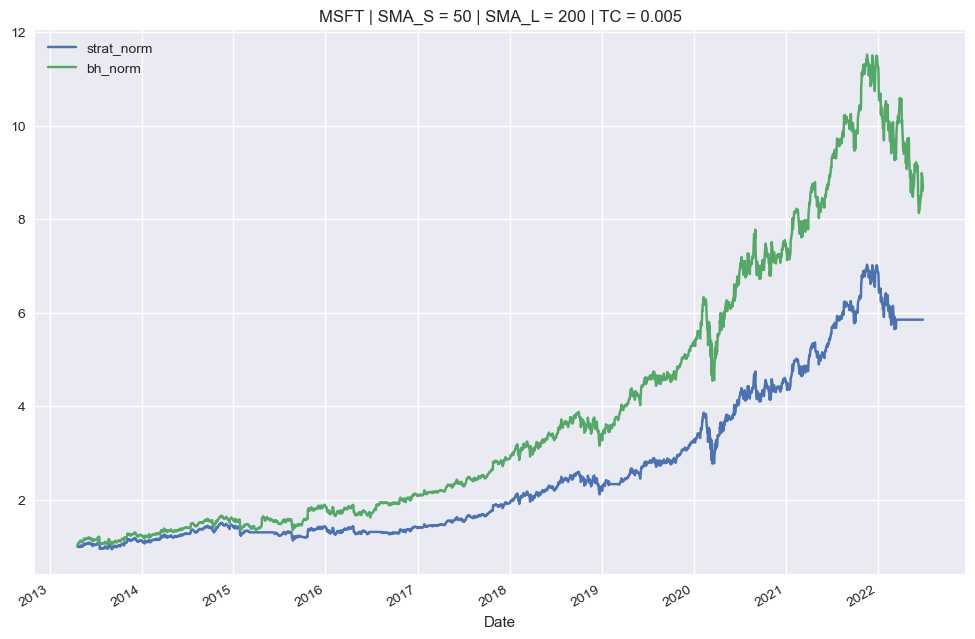

In [230]:
tester.plot_results()

In [231]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

(array([ 35., 227.]), 7.116141)

## Optimization and Forward Testing

In [234]:
start = "2004-01-01"
end = "2020-06-30"

In [239]:
filepath = "forex_pairs.csv"

In [240]:
pd.read_csv(filepath)

,Date,AUDEUR,EURUSD,USDGBP
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


In [241]:
symbol = "EURUSD"

In [242]:
sma_s = 50
sma_l = 200

In [243]:
ptc = 0.0005 

In [244]:
tester = SMABacktester(filepath, symbol, sma_s, sma_l, start, end, ptc, sell_pos = -1)
tester

SMABacktester(symbol = EURUSD, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [245]:
tester.test_strategy()

(1.256828, 0.341002)

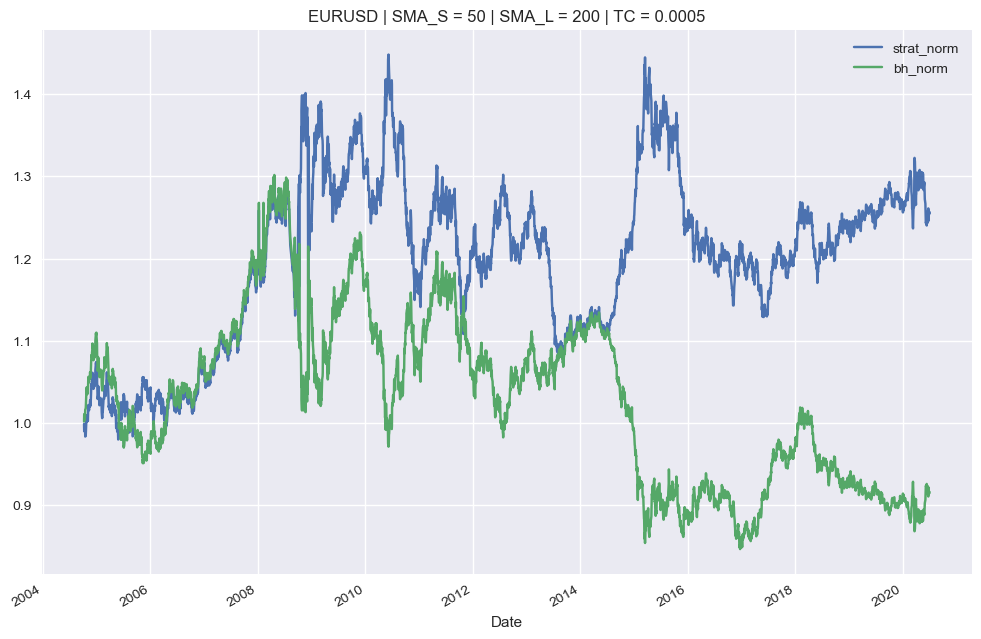

In [246]:
tester.plot_results()

In [247]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

(array([ 46., 137.]), 2.459386)

Problem: __"In-Sample"__ Testing <br>
Better: __"Out-Sample"__/Forward Testing (Split up into Optimization Period and Testing Period)

__Optimization__

In [251]:
opt_start = "2010-01-01"
opt_end = "2015-12-31"

In [252]:
tester = SMABacktester(filepath, symbol, sma_s, sma_l, opt_start, opt_end, ptc, sell_pos = -1)
tester

SMABacktester(symbol = EURUSD, SMA_S = 50, SMA_L = 200, start = 2010-01-01, end = 2015-12-31)

In [253]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

(array([ 48., 238.]), 1.463274)

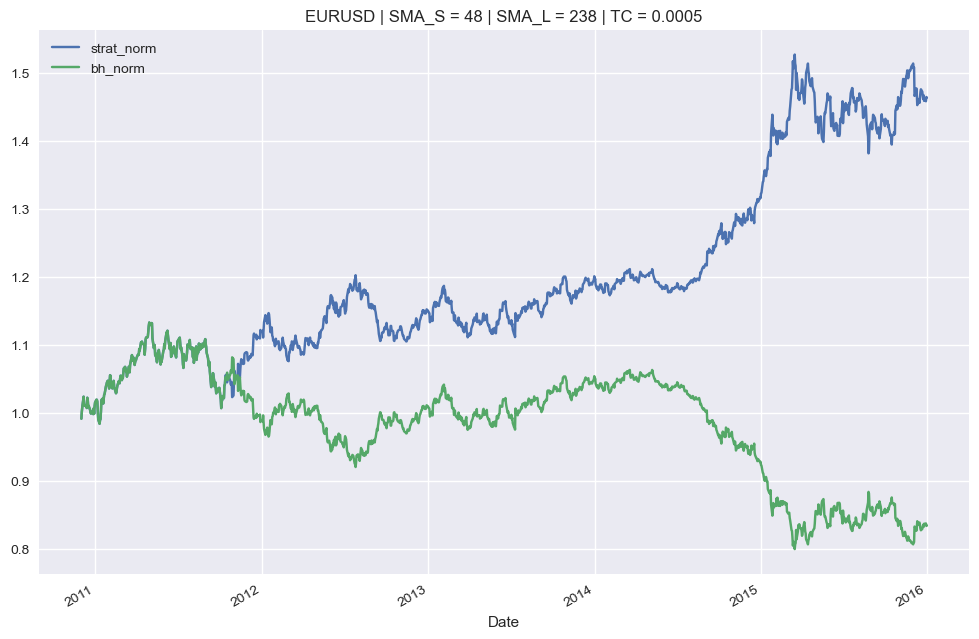

In [254]:
tester.plot_results()

__Forward testing__

In [257]:
opt_start = "2016-01-01"
opt_end = "2020-06-30"

In [258]:
tester = SMABacktester(filepath, symbol, 48, 238, opt_start, opt_end, ptc, sell_pos = -1)
tester

SMABacktester(symbol = EURUSD, SMA_S = 48, SMA_L = 238, start = 2016-01-01, end = 2020-06-30)

In [259]:
tester.test_strategy()

(1.04518, -0.013744)

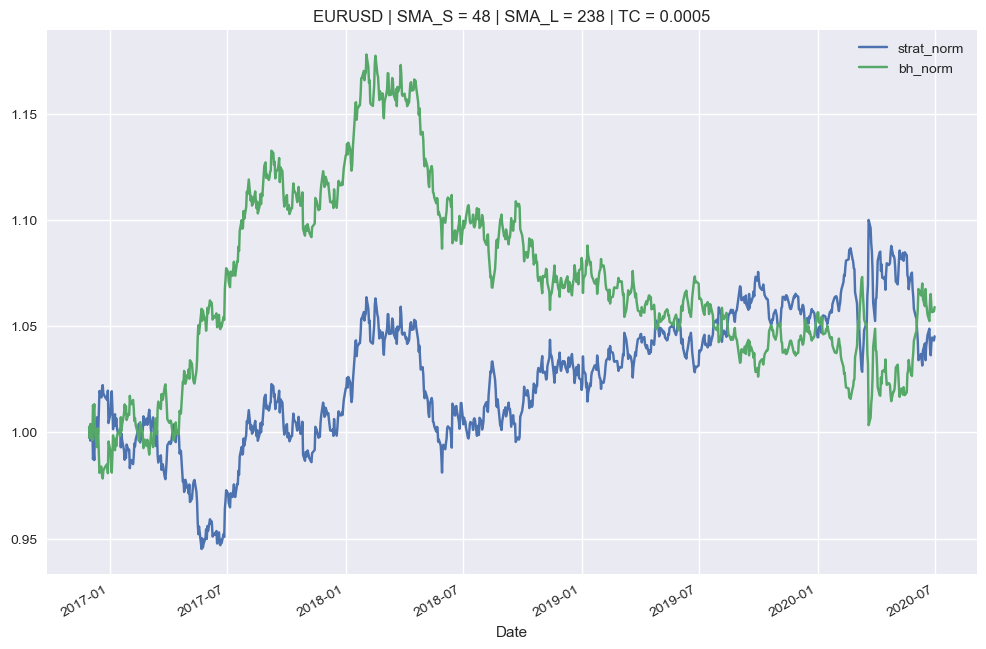

In [260]:
tester.plot_results()

In [353]:
even = []
for i in range(0,101):
    if i%2==0:
        even.append(i)

even

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100]

In [365]:
for i in even:
    sum = sum+ i
    

17950